# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [1]:
np.random.normal?
np.random.gamma?
np.random.exponential?


Object `np.random.normal` not found.
Object `np.random.gamma` not found.
Object `np.random.exponential` not found.


<IPython.core.display.Javascript object>


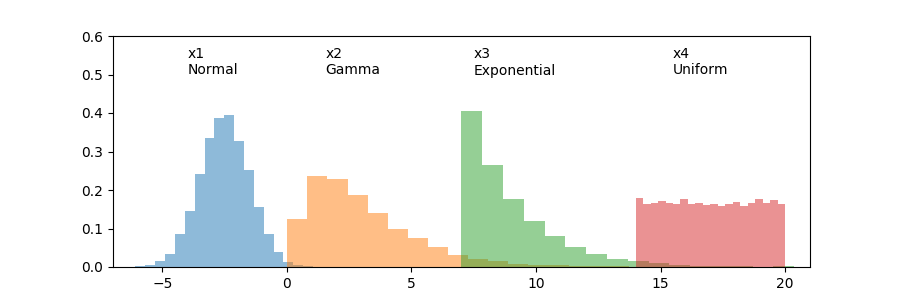

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [3]:
plt.bar?

<IPython.core.display.Javascript object>


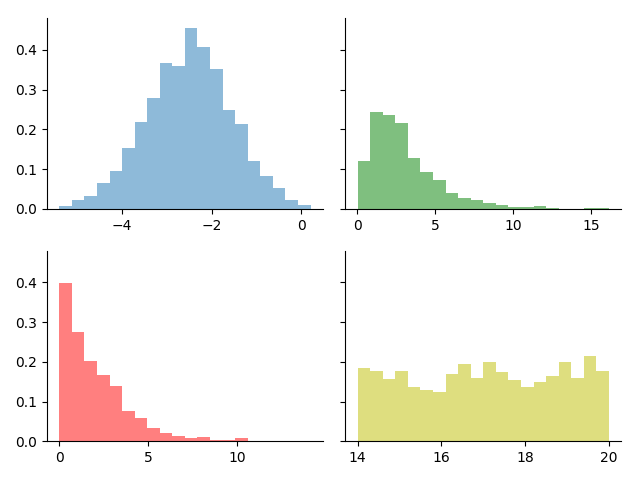

In [13]:
fig, axs = plt.subplots(2, 2, sharey=True)


for ax in axs.reshape(-1):
    ax.spines['right'].set_color('none')
    ax.spines["top"].set_color("none")

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

x1_sample = x1[:1000]
x2_sample = x2[:1000]
x3_sample = x3[:1000]-7
x4_sample = x4[:1000]

ax1.hist(x1_sample, normed=True, alpha=0.5, bins=20)
ax2.hist(x2_sample, normed=True, color="g", alpha=0.5, bins=20)
ax3.hist(x3_sample, normed=True, color="r", alpha=0.5, bins=20)
ax4.hist(x4_sample, normed=True, color="y", alpha=0.5, bins=20)

plt.tight_layout()




<IPython.core.display.Javascript object>


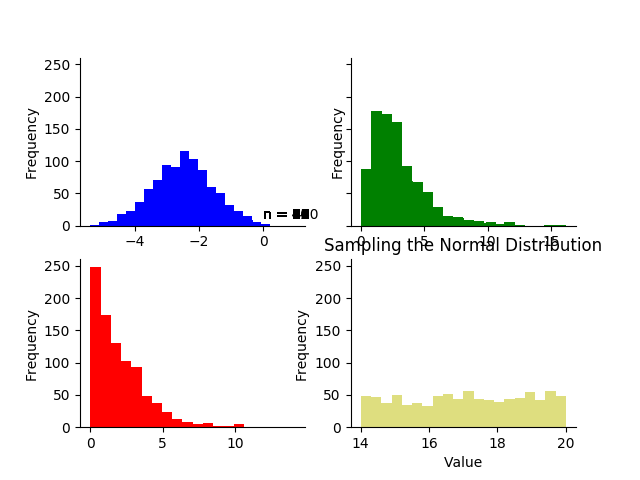

In [36]:
import matplotlib.animation as animation
n = 100
def update(curr):
    if(curr == n):
        a.event_source.stop()
    plt.cla()
    ax1.hist(x1_sample[100:100+10*curr], color='b', alpha=0.5, bins=20)
    ax2.hist(x2_sample[100:100+10*curr], color="g", alpha=0.5, bins=20)
    ax3.hist(x3_sample[100:100+10*curr], color="r", alpha=0.5, bins=20)
    ax4.hist(x4_sample[100:100+10*curr], color="y", alpha=0.5, bins=20)
    fig.gca().set_title('Sampling the Normal Distribution')
    
    for ax in axs.reshape(-1):
        ax.spines['right'].set_color('none')
        ax.spines["top"].set_color("none")
        ax.set_ylabel('Frequency')
        
    ax.set_xlabel('Value')
    
    ax1.annotate('n = {}'.format(curr), [0,10])
fig, axs = plt.subplots(2, 2, sharey=True)

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

a = animation.FuncAnimation(fig, update, interval=1)